In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Loading the Dataset

In [3]:
df = pd.read_csv('oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
# metadata 

'''

1) Subject ID - ID of the individual subject
2) MRI ID - ID of the MRI scan
3) Group - Demented / Non Demented i.e. variable to be predicted
4) Visit - Count of visit of the subject
5) MR Delay - Instrument error
6) M/F - Gender
7) Hand - Dominant Hand
8) Age - Age of Subject
9) EDUC - Educational level of subject [years of education]
10) SES - Socio Economic Status
11) MMSE - Mini Mental State Exam - An all round test of the brain which can yield a max score of 30 being the healthiest 
12) CDR - Clinical Dementia Rating
13) eTIV - Estimated Total IntraCranial Volume
14) nWBV - Normalized Whole Brain Volume
15) ASF - Atlas Scaling Factor



'''

'\n\n1) Subject ID - ID of the individual subject\n2) MRI ID - ID of the MRI scan\n3) Group - Demented / Non Demented i.e. variable to be predicted\n4) Visit - Count of visit of the subject\n5) MR Delay - Instrument error\n6) M/F - Gender\n7) Hand - Dominant Hand\n8) Age - Age of Subject\n9) EDUC - Educational level of subject [years of education]\n10) SES - Socio Economic Status\n11) MMSE - Mini Mental State Exam - An all round test of the brain which can yield a max score of 30 being the healthiest \n12) CDR - Clinical Dementia Rating\n13) eTIV - Estimated Total IntraCranial Volume\n14) nWBV - Normalized Whole Brain Volume\n15) ASF - Atlas Scaling Factor\n\n\n\n'

# Data Cleaning

In [5]:
print("\n Data Types of Columns")
df.dtypes


 Data Types of Columns


Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [6]:
print("Shape of Data")
df.shape

Shape of Data


(373, 15)

In [7]:
col = df.columns

print("\nNull Values in Each column\n")

for i in col:
    print(i , " = ", df[i].isnull().sum())


Null Values in Each column

Subject ID  =  0
MRI ID  =  0
Group  =  0
Visit  =  0
MR Delay  =  0
M/F  =  0
Hand  =  0
Age  =  0
EDUC  =  0
SES  =  19
MMSE  =  2
CDR  =  0
eTIV  =  0
nWBV  =  0
ASF  =  0


In [8]:
# fill null values with median as it is more robust
med_SES = df['SES'].median(skipna = True)
med_SES 


2.0

In [9]:
df['SES'].fillna(med_SES , inplace = True)

In [10]:
# no more null values in SES remain
df['SES'].isnull().sum()

0

In [11]:
# Similarly we clean the MMSE column too
med_MMSE = df['MMSE'].median(skipna=True)
df['MMSE'].fillna(med_MMSE , inplace=True)

In [12]:
# no more null values in MMSE remain
df['MMSE'].isnull().sum()

0

In [13]:
df.rename(columns = {"M/F" : "Gender"} , inplace = True)

In [14]:
# Our data is now ready for visualization and analysis 

# Data Visualization

In [15]:
dv = df

In [16]:
dv.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [17]:
 df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [18]:
df['Group'].unique()   # converted refers to people who were initially classified as non demented but later were classified as demented

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [19]:
males_total  = len(dv[dv['Gender'] == 'M'])
females_total = len(dv[dv['Gender'] == 'F'])

In [20]:
males_demented = len(dv[ (dv['Gender'] == 'M')   &  (dv['Group'] != "Nondemented")  ])
females_demented = len(dv[ (dv['Gender'] == 'F')   &  (dv['Group'] != "Nondemented")  ])

In [21]:
tot = []
tot.append(males_total)
tot.append(females_total)
tot

[160, 213]

In [22]:
dem = []
dem.append(males_demented)
dem.append(females_demented)
dem

[99, 84]

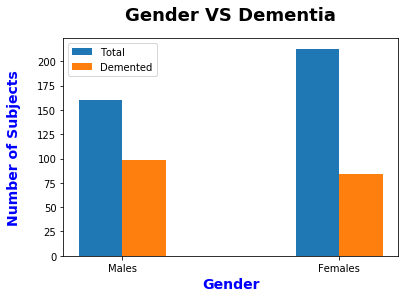

In [23]:
n = 2
X_axis = np.arange(n)
X = ['Males' , 'Females']

plt.bar(X_axis - 0.1   , tot , label = 'Total' , width = 0.2)
plt.bar(X_axis + 0.1 , dem , label = 'Demented' , width = 0.2)

plt.xticks(X_axis , X)
plt.xlabel("Gender" , color = "blue" , fontweight = "bold" , fontsize = 14)
plt.ylabel("Number of Subjects" , color = "blue" , fontweight = "bold" , fontsize = 14 , labelpad = 16)
plt.title("Gender VS Dementia", fontweight = "bold" , fontsize = 18 , pad = 18)
plt.legend()
plt.show()

In [24]:
ses_cat = dv['SES'].unique()

In [25]:
ses_cat.sort()

In [26]:
ses_cat
    

array([1., 2., 3., 4., 5.])

In [27]:
ses_dem = []

for i in ses_cat : 
    ses_dem.append(len( dv[ (dv['SES'] == i) & (dv['Group'] != "Nondemented") ] ))

In [28]:
ses_dem

[47, 51, 40, 40, 5]

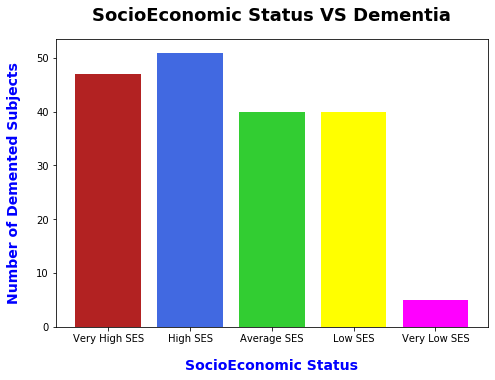

In [29]:
fig = plt.figure()
X = ['Very High SES' , 'High SES' , 'Average SES' , 'Low SES' , 'Very Low SES']
ax = fig.add_axes([0,0,1,1])
ax.bar(X , ses_dem , color = ['firebrick' , 'royalblue' , 'limegreen' , 'yellow' , 'magenta'])
ax.set_xlabel('SocioEconomic Status' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
ax.set_ylabel('Number of Demented Subjects' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
plt.title("SocioEconomic Status VS Dementia", fontweight = "bold" , fontsize = 18 , pad = 18)
plt.show()

In [33]:
age = df['Age']
norm_brain = df['nWBV']
norm_brain = norm_brain*1000

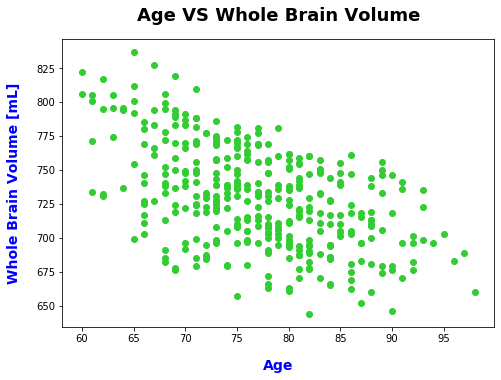

In [37]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(age,norm_brain , color = 'limegreen')
ax.set_xlabel('Age' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
ax.set_ylabel('Whole Brain Volume [mL]' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
plt.title('Age VS Whole Brain Volume' , fontweight = "bold" , fontsize = 18 , pad = 18)
plt.show()

In [42]:
cdr = df['CDR'].unique()
cdr

array([0. , 0.5, 1. , 2. ])

In [47]:
cdr_dem = []
cdr_tot = []
for i in cdr :
    cdr_dem.append(len(df[ (df['CDR'] == i)  &  (df['Group'] != 'Nondemented') ]))
    cdr_tot.append(len(df[df['CDR'] == i]))

    

In [53]:
cdr_perc = []
for i in range(4) : 
    cdr_perc.append( round(  ((cdr_dem[i] / cdr_tot[i])*100) , 2 ) ) 


cdr_perc 
    

[8.74, 98.37, 100.0, 100.0]

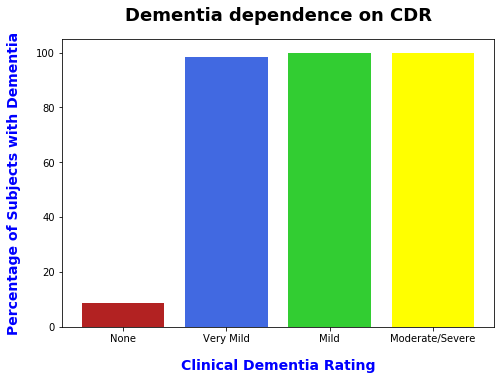

In [64]:
X = ['None' , 'Very Mild' , 'Mild' , 'Moderate/Severe']

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(X , cdr_perc , color = ['firebrick' , 'royalblue' , 'limegreen' , 'yellow' , 'magenta'])
ax.set_xlabel('Clinical Dementia Rating' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
ax.set_ylabel('Percentage of Subjects with Dementia' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
plt.title("Dementia dependence on CDR", fontweight = "bold" , fontsize = 18 , pad = 18)
plt.show()

## Analysis

In [65]:
'''

The analysis that has been carried out from the various graphs based on the data in the dataset are : 

1) Higher percentage of males are demented than females
2) The SES has little or no effect on dementia as almost all the different SES categories have the same number of demented subjects [very poor being the exception]
3) The Whole Brain Volume has a lot of variance for a given age however it has a slightly negative linear relation with age
4) Clinical Dementia Rating is highly correlated to our target variable. 100% of people with a CDR higher than 0.5 have been classified as demented.

'''

'\n\nThe analysis that has been carried out from the various graphs based on the data in the dataset are : \n\n1) Higher percentage of males are demented than females\n2) The SES has little or no effect on dementia as almost all the different SES categories have the same number of demented subjects [very poor being the exception]\n3) The Whole Brain Volume has a lot of variance for a given age however it has a slightly negative linear relation with age\n4) Clinical Dementia Rating is highly correlated to our target variable. 100% of people with a CDR higher than 0.5 have been classified as demented.\n\n'